## Unsupervised Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Credit_Card_Applications.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

# Randomly initialize the weights
som.random_weights_init(X)

In [6]:
# Train the som
som.train_random(data = X, num_iteration = 100)

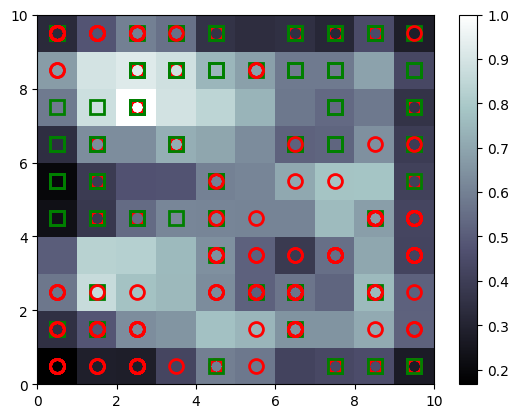

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] +0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2, 7)], mappings[(2, 8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [9]:
print(frauds)

[[1.5786237e+07 0.0000000e+00 1.9170000e+01 5.8500000e-01 1.0000000e+00
  6.0000000e+00 4.0000000e+00 5.8500000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5767358e+07 0.0000000e+00 4.9830000e+01 1.3585000e+01 2.0000000e+00
  4.0000000e+00 8.0000000e+00 8.5000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5567839e+07 0.0000000e+00 2.8580000e+01 3.5400000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 5.0000000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.7100000e+02 1.0000000e+00]
 [1.5671014e+07 0.0000000e+00 2.5330000e+01 2.0850000e+00 2.0000000e+00
  8.0000000e+00 8.0000000e+00 2.7500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.6000000e+02 2.0000000e+00]
 [1.5579583e+07 0.0000000e+00 2.5080000e+01 2.5400000e+00 1.0000000e+00
  6.0000000e+00 4.0000000e+00 2.5000000e-01 1.0000000e+00 0.

## Supervised Method

In [10]:
# Creating a matrix of features
customers = df.iloc[:, 1:].values

In [11]:
# Creating the dependent variable
is_fraud = np.zeros(len(df))
for i in range(len(df)):
    if df.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [12]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### ANN

In [67]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
classifier = Sequential()

In [69]:
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [70]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4675 - accuracy: 0.9536
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.2000 - accuracy: 0.9551


In [72]:
y_pred = classifier.predict(customers)

22/22 [==============================] - 0s 1ms/step


In [73]:
y_pred = np.concatenate((df.iloc[:, 0:1].values, y_pred), axis = 1)
#y_pred = pd.DataFrame(y_pred)
y_pred

array([[1.57761560e+07, 3.64299603e-02],
       [1.57395480e+07, 6.13708980e-02],
       [1.56628540e+07, 5.80408834e-02],
       ...,
       [1.56754500e+07, 2.41635069e-01],
       [1.57764940e+07, 1.26286000e-01],
       [1.55924120e+07, 9.64688361e-02]])

In [74]:
# Sorting the y_pred
y_pred = y_pred[y_pred[:, 1].argsort()]

In [77]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0,1
0,15621423.0,0.002521
1,15778589.0,0.006591
2,15644400.0,0.007827
3,15684440.0,0.010026
4,15815040.0,0.011064
...,...,...
685,15594133.0,0.342088
686,15767358.0,0.342088
687,15646190.0,0.342088
688,15593345.0,0.342088
